# Creating the boundary forcing

In [1]:
from roms_tools import Grid, VerticalCoordinate

We start by creating a grid and the vertical coordinate system. Note that it is important to use the same grid and vertical coordinate system throughout all the steps (i.e., creating tidal forcing, atmospheric forcing, initial conditions, etc.) to set up a consistent ROMS simulation. Here, we use the following grid and vertical coordinate system.

In [2]:
grid = Grid(
    nx=100, ny=100, size_x=1800, size_y=2400, center_lon=-21, center_lat=61, rot=20
)

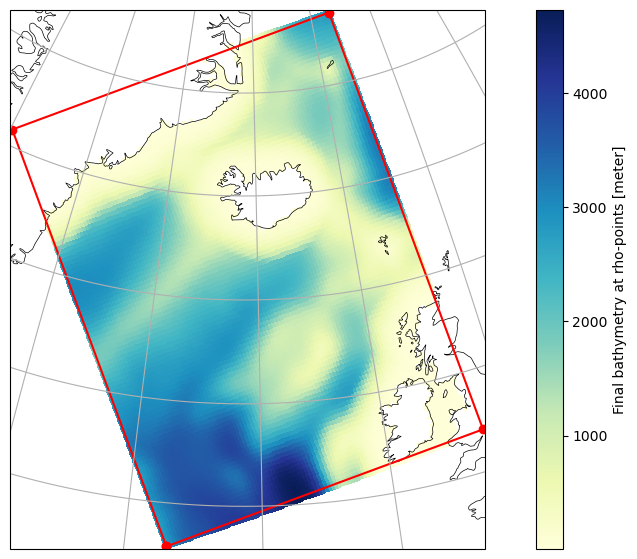

In [3]:
grid.plot(bathymetry=True)

In [4]:
vertical_coordinate = VerticalCoordinate(
    grid=grid,
    N=100,  # number of vertical levels
    theta_s=5.0,  # surface control parameter
    theta_b=2.0,  # bottom control parameter
    hc=300.0,  # critical depth
)

## Boundary forcing from GLORYS
In this section, we use GLORYS data to create our boundary forcing. Say we want to get boundary forcing from January 2, 2012 to January 3, 2012.

In [5]:
from datetime import datetime

In [6]:
start_time = datetime(2012, 1, 2)
end_time = datetime(2012, 1, 4)

Our GLORYS data for that day sits at the following path.

In [7]:
filename = "/glade/derecho/scratch/bachman/GLORYS/NA/2012/*.nc"

We can now create the `BoundaryForcing` object.

In [8]:
from roms_tools import BoundaryForcing

In [9]:
%%time

bdry_forcing = BoundaryForcing(
    grid=grid,
    vertical_coordinate=vertical_coordinate,
    start_time=start_time,
    end_time=end_time,
    filename=filename,
)

CPU times: user 16.8 s, sys: 3.34 s, total: 20.1 s
Wall time: 1min


The boundary forcing variables are held in an xarray Dataset that is accessible via the `.ds` property.

In [10]:
bdry_forcing.ds

<xarray.Dataset> Size: 2MB
Dimensions:                    (time: 2, xi_rho_south: 102, s_rho: 100,
                                xi_u_south: 101, xi_v_south: 102, s_w: 101,
                                eta_rho_east: 102, eta_u_east: 102,
                                eta_v_east: 101, xi_rho_north: 102,
                                xi_u_north: 101, xi_v_north: 102,
                                eta_rho_west: 102, eta_u_west: 102,
                                eta_v_west: 101)
Coordinates: (12/50)
  * time                       (time) datetime64[ns] 16B 2012-01-02T12:00:00 ...
    layer_depth_rho_south      (xi_rho_south, s_rho) float32 41kB 2.864e+03 ....
    layer_depth_u_south        (xi_u_south, s_rho) float32 40kB 2.864e+03 ......
    layer_depth_v_south        (xi_v_south, s_rho) float32 41kB 2.864e+03 ......
    interface_depth_rho_south  (xi_rho_south, s_w) float32 41kB 2.886e+03 ......
    interface_depth_u_south    (xi_u_south, s_w) float32 41kB 2.886e+03 ... -0.0
    ...                         ...
    lat_u_west                 (eta_u_west) float64 816B 47.87 48.07 ... 65.81
    lat_v_west                 (eta_v_west) float64 808B 47.94 48.13 ... 65.68
    lon_rho_west               (eta_rho_west) float64 816B 333.0 332.9 ... 310.2
    lon_u_west                 (eta_u_west) float64 816B 333.2 333.0 ... 310.4
    lon_v_west                 (eta_v_west) float64 808B 333.0 332.9 ... 310.4
    bry_time                   (time) timedelta64[ns] 16B 4384 days 12:00:00 ...
Dimensions without coordinates: xi_rho_south, s_rho, xi_u_south, xi_v_south,
                                s_w, eta_rho_east, eta_u_east, eta_v_east,
                                xi_rho_north, xi_u_north, xi_v_north,
                                eta_rho_west, eta_u_west, eta_v_west
Data variables: (12/34)
    zeta_south                 (time, xi_rho_south) float32 816B dask.array<chunksize=(1, 102), meta=np.ndarray>
    temp_south                 (time, xi_rho_south, s_rho) float32 82kB dask.array<chunksize=(1, 102, 100), meta=np.ndarray>
    salt_south                 (time, xi_rho_south, s_rho) float32 82kB dask.array<chunksize=(1, 102, 100), meta=np.ndarray>
    u_south                    (time, xi_u_south, s_rho) float32 81kB dask.array<chunksize=(1, 101, 100), meta=np.ndarray>
    v_south                    (time, xi_v_south, s_rho) float32 82kB dask.array<chunksize=(1, 102, 100), meta=np.ndarray>
    ubar_south                 (xi_u_south, time) float32 808B dask.array<chunksize=(101, 1), meta=np.ndarray>
    ...                         ...
    theta_s                    float32 4B 5.0
    theta_b                    float32 4B 2.0
    Tcline                     float32 4B 300.0
    hc                         float32 4B 300.0
    sc_r                       (s_rho) float32 400B -0.995 -0.985 ... -0.005
    Cs_r                       (s_rho) float32 400B -0.992 ... -9.874e-06
Attributes:
    Title:    ROMS boundary forcing file produced by roms-tools

You can see that all initial conditions variables are Dask arrays, so these fields have not been actually computed yet. Full computation will not be triggered until the `.plot` or `.save` methods are called.

## Plotting

Let's make some plots! As an example, let's have a look at the zonal velocity field `u` at the southern and western boundaries.

In [11]:
from dask.diagnostics import ProgressBar

[########################################] | 100% Completed | 73.65 ss
CPU times: user 1min 4s, sys: 1.26 s, total: 1min 5s
Wall time: 1min 13s


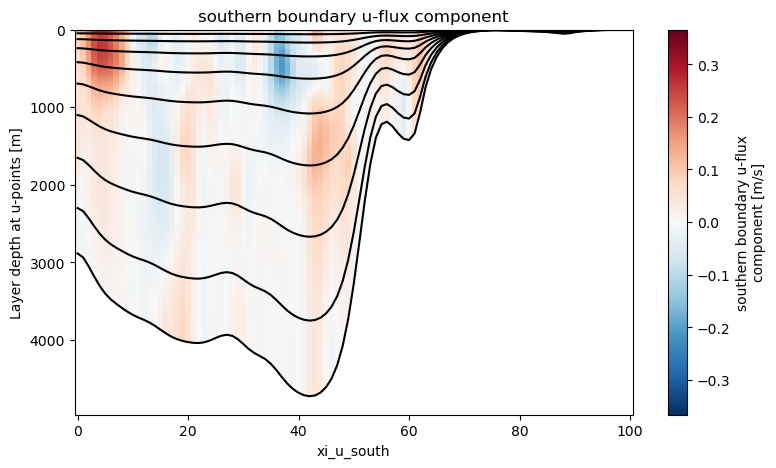

In [12]:
with ProgressBar():
    %time bdry_forcing.plot("u_south", time=0, layer_contours=True)

[########################################] | 100% Completed | 100.53 s
CPU times: user 1min 4s, sys: 1.24 s, total: 1min 6s
Wall time: 1min 40s


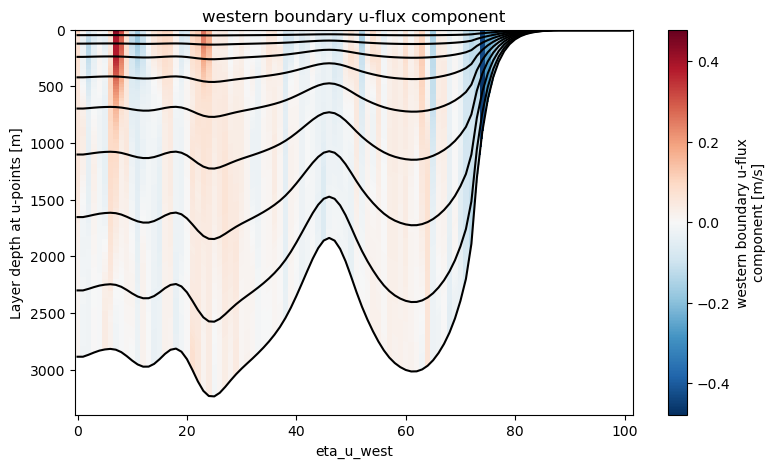

In [13]:
with ProgressBar():
    %time bdry_forcing.plot("u_west", time=0, layer_contours=True)

Sea surface height `zeta` at any of the boundaries and for a specific time is only a 1D variable.

[########################################] | 100% Completed | 2.19 sms
CPU times: user 1 s, sys: 12.5 ms, total: 1.01 s
Wall time: 2.24 s


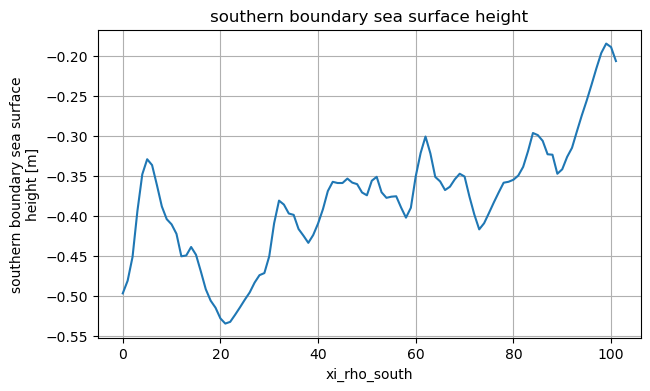

In [14]:
with ProgressBar():
    %time bdry_forcing.plot("zeta_south", time=0)

## Saving as NetCDF file
We can now save the dataset as a NetCDF file.

In [15]:
path = "/glade/derecho/scratch/noraloose/forcing/bdry_frc"

In [16]:
with ProgressBar():
    %time bdry_forcing.save(path)

Saving the following files:
/glade/derecho/scratch/noraloose/forcing/bdry_frc.20120102-03.nc
[########################################] | 100% Completed | 432.02 s
[########################################] | 100% Completed | 369.69 s
CPU times: user 9min 30s, sys: 8.31 s, total: 9min 38s
Wall time: 13min 23s
